In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
from keras.utils.np_utils import to_categorical 
from keras.datasets import mnist

2022-11-15 15:51:07.607600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 15:51:07.713187: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-15 15:51:07.716768: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 15:51:07.716778: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))
print(num_labels)

11490434/11490434 [==============================] - 0s 0us/step
10


In [3]:
#Run this section only once because it once the shape of x_train and x_test is changed it will give you error.
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
print(input_size,x_train.shape)
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

784 (60000, 28, 28)


In [4]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units,activation='relu'))
model.add(Dropout(dropout))
# this is the output for one-hot vector
model.add(Dense(num_labels, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


2022-11-15 15:51:19.331205: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 15:51:19.331241: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 15:51:19.331268: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (crumblerworm): /proc/driver/nvidia/version does not exist
2022-11-15 15:51:19.331584: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.8682
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1903 - accuracy: 0.9437
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1509 - accuracy: 0.9548
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1254 - accuracy: 0.9625
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1119 - accuracy: 0.9666
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1026 - accuracy: 0.9685
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0938 - accuracy: 0.9712
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0865 - accuracy: 0.9729
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0817 - accuracy: 0.9742
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0781 - accuracy: 0.9761

Using the above architecture, I assess the impact of drop-out rate present in both the layers with respect to the model performance by choosing differnt drop-out rate from the set {0, 0.2, 0.4, 0.6, 0.8}. 
<br><br>

In [6]:
# Define dropout rates to check
dr = [0., 0.2, 0.4, 0.6, 0.8]

def dropout_assess(hidden_units, num_labels, input_size,  dropout):
  model = Sequential()
  model.add(Dense(hidden_units, input_dim=input_size, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(hidden_units,activation='relu'))
  model.add(Dropout(dropout))
  # this is the output for one-hot vector
  model.add(Dense(num_labels, activation='softmax'))

  model.summary()
  return model

# Loop through dropout rates and store results
losses = []
accuracy = []
for val in dr:
  print('Calculating for %s dropout rate'%val)
  model = dropout_assess(hidden_units, num_labels, input_size, dropout=val,)

  # Compile model
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  # Train the network
  model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

  # validate the model on the test dataset and store results
  loss, acc  = model.evaluate(x_test, y_test, batch_size=batch_size)
  print("\nTest accuracy: %.1f%%" % (100.0 * acc))
  losses.append(loss)
  accuracy.append(acc)



Calculating for 0.0 dropout rate
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/

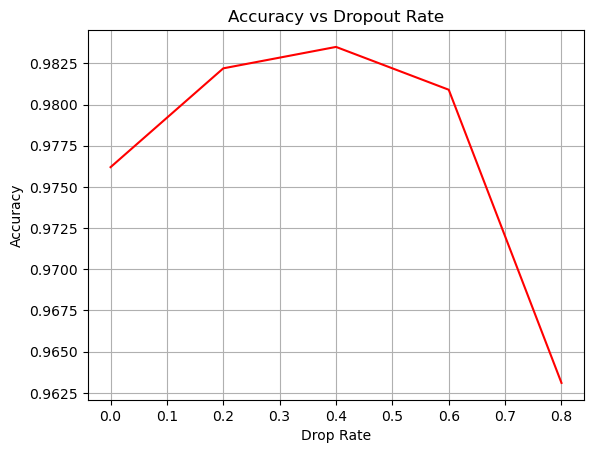

In [7]:
import matplotlib.pyplot as plt
# Plot the results
fig, ax = plt.subplots()

ax.plot(dr,
        accuracy,
        color='r')
ax.set_xlabel('Drop Rate')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Dropout Rate')
ax.grid(True)

What we see is an overall drop in accuracy as the drop rate becomes greater. This is because there are more neurons that are being dropped (disconnected) from the model, so it is expected that there will be and overall drop in accuracy.

Now I repeat the above experiment without applying drop-out layer, but assess the impact of L2 norm based kernel regularizer in the first two layers with respect to the model performance by choosing differnt L2 norm coefficient from the set {0, 0.001, 0.002, 0.004, 0.006}. 
<br><br>

In [8]:
def dropout_assess(hidden_units, num_labels, input_size,  regs):
  l2_model = Sequential()
  l2_model.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=regularizers.l2(regs)))
  l2_model.add(Activation('relu'))
  l2_model.add(Dense(hidden_units, kernel_regularizer=regularizers.l2(val)))
  l2_model.add(Activation('relu'))
  l2_model.add(Dense(num_labels))
  # this is the output for one-hot vector
  l2_model.add(Activation('softmax'))

  model.summary()
  return l2_model

# Loop through dropout rates and store results
losses = []
accuracy = []

# L2 kernel
regs = [0., 0.001, 0.002, 0.004, 0.006]
for val in regs:
  print('Calculating for %s L2 kernal regularization'%val)
  model = dropout_assess(hidden_units, num_labels, input_size, regs=val)

  # Compile model
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  # Train the network
  model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

  # validate the model on the test dataset and store results
  loss, acc  = model.evaluate(x_test, y_test, batch_size=batch_size)
  print("\nTest accuracy: %.1f%%" % (100.0 * acc))
  losses.append(loss)
  accuracy.append(acc)



Calculating for 0.0 L2 kernal regularization
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Epo

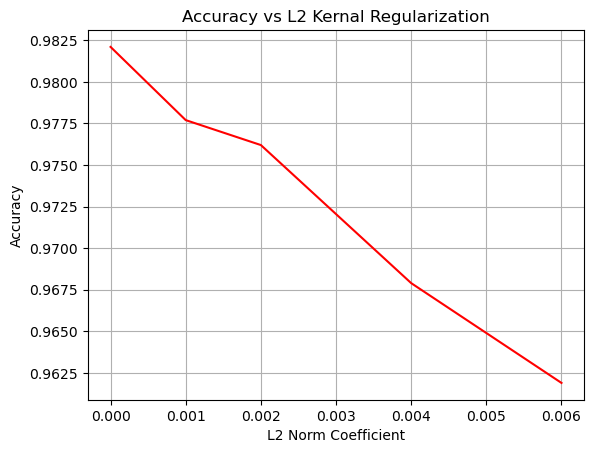

In [ ]:
# Plot the results
fig, ax = plt.subplots()
ax.plot(regs,
        accuracy,
        color='r')
ax.set_xlabel('L2 Norm Coefficient')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs L2 Kernal Regularization')
ax.grid(True)

As opposed to the dropout rate, as the L2 norm coefficent (the weight coefficeint) becomes smaller, the accuracy of the model begins to drop. 

Looking at this for future assessments, I would currently suggest using the dropout method over the L2 norm regularaization method. Looking at the graphs, the dropout remains stable for a longer period then the L2 regularization. The accuracy is also slightly higher using the dropout method. Computationally, it was faster to run as well. I believe for this model, the dropout method is the better choice.